# EOS module tutorial

**Authors: Roberto A. Tejada Arevalo**

The `eos` module provides access to the SCvH95, MH13, CMS19+HG23, CD21, and MLS22+HG23 hydrogen and helium (H-He) equations of state (EOSes). For purposes of this tutorial, we will focus here o nthe SCvH95 and CMS19+HG23 EOSes, but will showcase MH13 and MLS22+HG23 at the end. This module also provdes access to metallicity EOSes, such as water, post-perovskite, iron, and serpentine materials. The list of metals will be expanded in the future.

THe `eos` module, like the `misc` module, are meanat to be submodules planetary evolution codes to conveniently be imported and called during evolutionary calculations. Each H-He EOS has its own python script with similar function format.

**Note that HG23 provided corrections to the density and entropy of the CMS19 and MLS22 EOSes only and not the internal energy. The internal energy calculations thus rely on the volume addition law without non-ideal interaction corrections.**

The collection of EOS modules is

**H-He**
- SCvH95: `scvh_eos`
- CMS19+HG23: `cms_eos`
- MH13: `mh13_eos`
- MLS22+HG23: `mls_eos`
- Ideal: `ideal_eos`

**Metals**
- AQUA (water): `aqua_eos`
- Post-perovskite: `ppv_eos`
- Iron: `fe_eos`
- Serpentine (ANEOS): `serpentine_eos`

To access each EOS, you can import them individually,


In [1]:
from eos import cms_eos, scvh_eos, aqua_eos

Or you may call `mixtures_eos`, which loads all these and provides H-He-Z mixtures.

In [2]:
from eos import mixtures_eos

The individual modules are H-He only, whereas `mixtures_eos` also provides H-He only access when the metals are set to zero. 

All EOS modules take in the following standardized inputs:

- Density: log10 g $\rm{cm}^{-3}$

- Pressure: log10 dyn $\rm{cm}^{-2}$

- Temperature: log10 K

- Specific Entropy: $k_b$/baryon ($\sim 1.203 \times 10^{-8}$ erg $\rm{g}^{-1}$  $\rm{K}^{-1}$)

- Specific Internal Energy: log10 erg $\rm{g}^{-1}$

Where as the specific entropy inputs in $k_b/$ baryon, the outputs are in erg $\rm{g}^{-1}$  $\rm{K}^{-1}$. The outputs of the specific internal energy ($u$) are also in cgs units, erg $\rm{g}^{-1}$.


Let's define a grid of pressures, temperatures, at a constant helium mass fraction (Y) and zero metallicity (Z) for now. 



## $P, T$

In [3]:
import numpy as np

logpgrid = np.linspace(6, 14, 100) # from 1 bar to 100 Mbar
logtgrid = np.linspace(2, 5, 100) # from 100 Kelvin to 100,000 Kelvin
y_const = np.full_like(logpgrid, 0.277) # mass fraction constant at solar abundance

# Let's say we wnat to find out what the density and the entropy along this grid are

logrho_cms = cms_eos.get_rho_pt(logpgrid, logtgrid, y_const)
s_cms = cms_eos.get_s_pt(logpgrid, logtgrid, y_const) # remember that the output is in cgs units

logrho_scvh = scvh_eos.get_rho_pt(logpgrid, logtgrid, y_const)
s_scvh= scvh_eos.get_s_pt_tab(logpgrid, logtgrid, y_const)

Let's plot these quantities

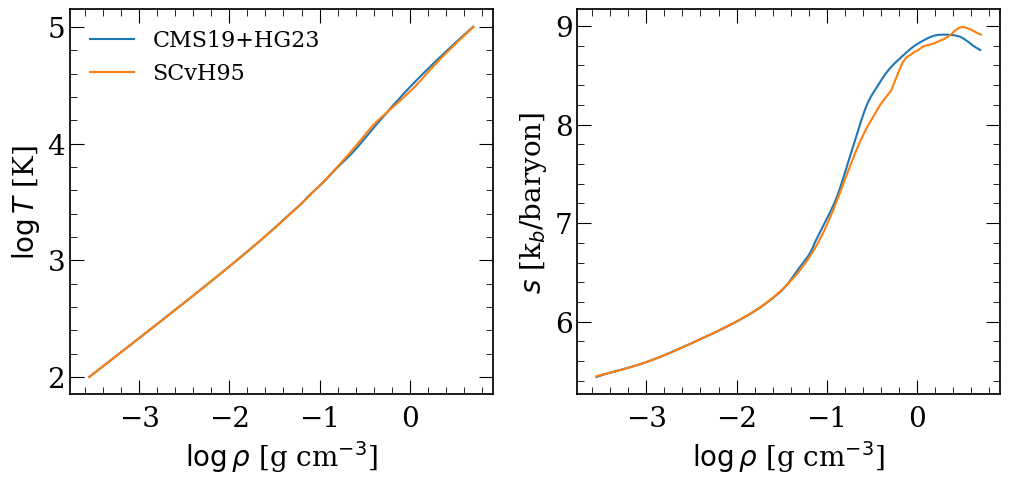

In [4]:
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rc('text', usetex=False)
plt.rc('font', family='serif',size=20)
plt.rc('axes', linewidth=1.25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20, direction='in')
plt.rc('ytick', labelsize=20, direction='in')
plt.rc('legend', fontsize=10)

plt.rc('xtick.major',size=10,pad=8)
plt.rc('xtick.minor',size=5,pad=8)
plt.rc('ytick.major',size=10)
plt.rc('ytick.minor',size=5)


fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# CMS:
ax1.plot(logrho_cms, logtgrid, label='CMS19+HG23')
ax2.plot(logrho_cms, s_cms*cms_eos.erg_to_kbbar) # in kb/baryon units

ax1.plot(logrho_scvh, logtgrid, label='SCvH95')
ax2.plot(logrho_scvh, s_scvh*cms_eos.erg_to_kbbar) # in kb/baryon units

ax1.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax1.set_ylabel(r'$\log{T}$ [K]')

ax2.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax2.set_ylabel(r'$s$ [k$_b/$baryon]')

ax1.minorticks_on()
ax2.minorticks_on()

ax1.legend(frameon=False, prop={'size':16})

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

plt.show()


We can observe here that for densities below 0.1 g $\rm{cm}^{-3}$, the CMS19 EOS agrees with the classical SCvH95 EOS. This is because the CMS EOS used the SCvH EOS at low densities (see Chabrier et al. 2019)

Now, let's compare this to `mixtures_eos`. This module has an argument for your selection of H-He EOS, `hhe_eos`.

The strings options are:

- `scvh`: SCvH95
- `mh13`: MH13
- `cms`: CMS19+HG23
- `mls`: MLS22+HG23

`mixtures_eos` also provides an option for the metallicity EOS (`z_eos`) to fetch the mixtures from, but only AQUA (Haldemann et al. 2020) is available at the moment. Mixtures with other metals will be provided soon.

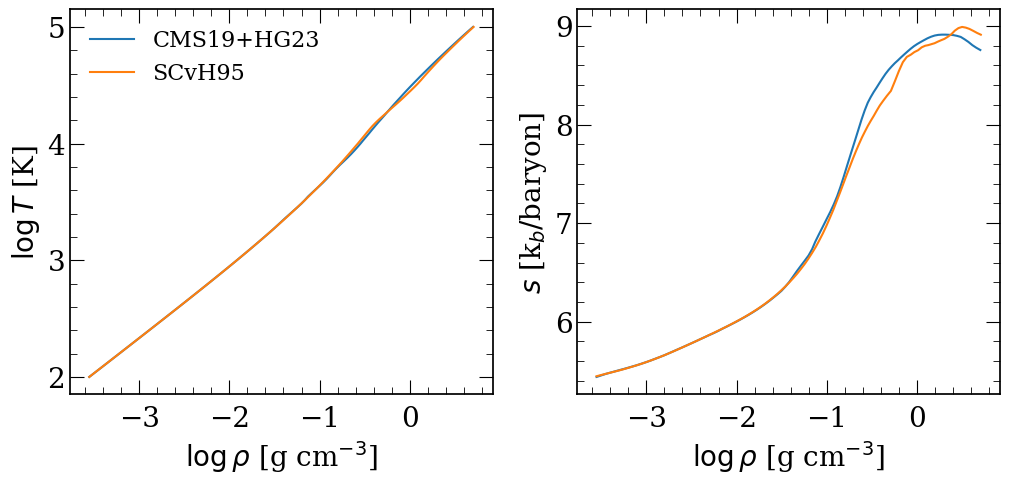

In [5]:
# let's define a Z grid of zeros

# The vectorized functions require that all input arrays are the same length!

z_0 = np.zeros(len(logpgrid))

logrho_cms, s_cms = mixtures_eos.get_rho_pt(logpgrid, logtgrid, y_const, z_0, hhe_eos='cms'), mixtures_eos.get_s_pt(logpgrid, logtgrid, y_const, z_0, hhe_eos='cms')
logrho_scvh, s_scvh = mixtures_eos.get_rho_pt(logpgrid, logtgrid, y_const, z_0, hhe_eos='scvh'), mixtures_eos.get_s_pt(logpgrid, logtgrid, y_const, z_0, hhe_eos='scvh')

fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# CMS:
ax1.plot(logrho_cms, logtgrid, label='CMS19+HG23')
ax2.plot(logrho_cms, s_cms*cms_eos.erg_to_kbbar) # in kb/baryon units

ax1.plot(logrho_scvh, logtgrid, label='SCvH95')
ax2.plot(logrho_scvh, s_scvh*cms_eos.erg_to_kbbar) # in kb/baryon units

ax1.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax1.set_ylabel(r'$\log{T}$ [K]')

ax2.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax2.set_ylabel(r'$s$ [k$_b/$baryon]')

ax1.minorticks_on()
ax2.minorticks_on()

ax1.legend(frameon=False, prop={'size':16})

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

plt.show()

Note that by default, `mixtures_eos` did not ask for a Z EOS. You can specify it when you're ready to include metals in your mixture, though this only takes water (AQUA for now):

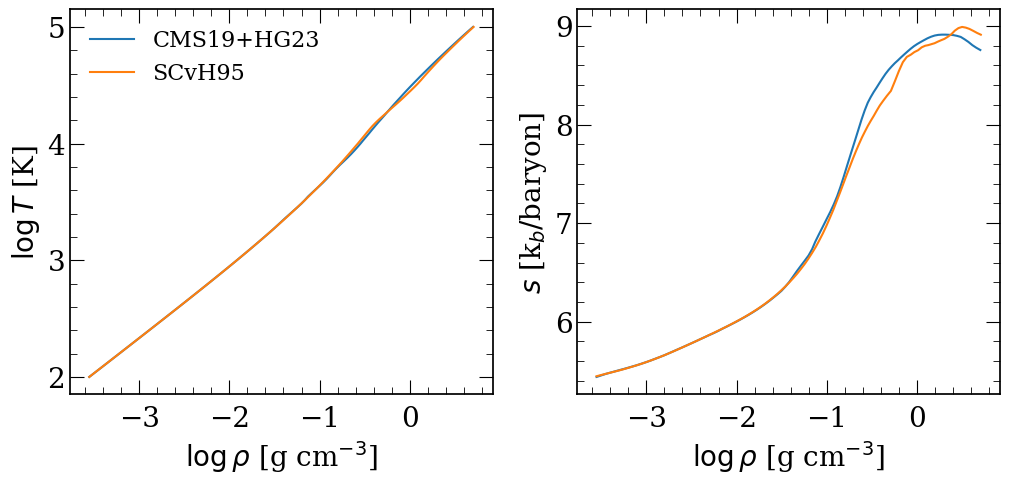

In [6]:
z_0 = np.zeros(len(logpgrid))

logrho_cms, s_cms = mixtures_eos.get_rho_pt(logpgrid, logtgrid, y_const, z_0, hhe_eos='cms', z_eos='aqua'), mixtures_eos.get_s_pt(logpgrid, logtgrid, y_const, z_0, hhe_eos='cms', z_eos='aqua')
logrho_scvh, s_scvh = mixtures_eos.get_rho_pt(logpgrid, logtgrid, y_const, z_0, hhe_eos='scvh', z_eos='aqua'), mixtures_eos.get_s_pt(logpgrid, logtgrid, y_const, z_0, hhe_eos='scvh', z_eos='aqua')

fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# CMS:
ax1.plot(logrho_cms, logtgrid, label='CMS19+HG23')
ax2.plot(logrho_cms, s_cms*cms_eos.erg_to_kbbar) # in kb/baryon units

ax1.plot(logrho_scvh, logtgrid, label='SCvH95')
ax2.plot(logrho_scvh, s_scvh*cms_eos.erg_to_kbbar) # in kb/baryon units

ax1.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax1.set_ylabel(r'$\log{T}$ [K]')

ax2.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax2.set_ylabel(r'$s$ [k$_b/$baryon]')

ax1.minorticks_on()
ax2.minorticks_on()

ax1.legend(frameon=False, prop={'size':16})

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

plt.show()

Let's set a constnat Z = 0.02 (~10 times solar abundance) and compare to the H-He only mixtures

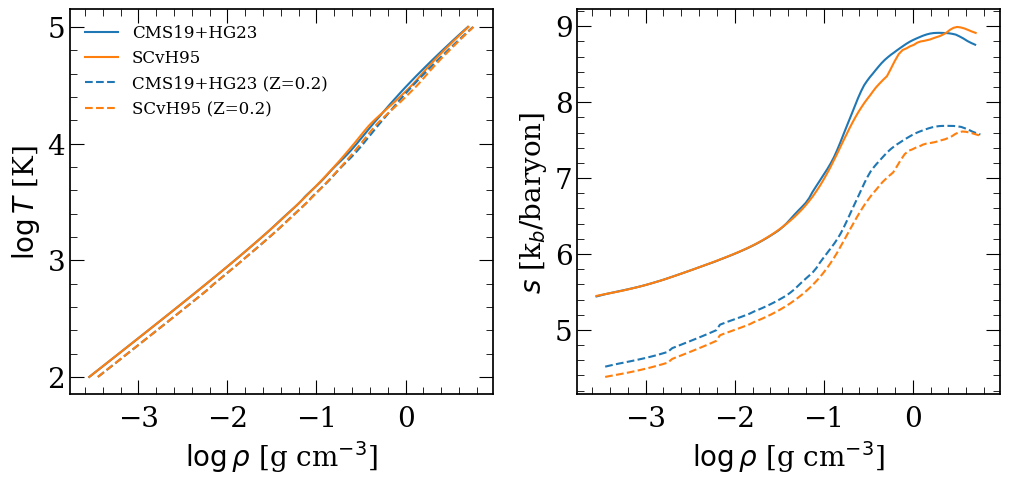

In [7]:
z_const = np.full_like(logpgrid, 0.2)

logrho_cms_z, s_cms_z = mixtures_eos.get_rho_pt(logpgrid, logtgrid, y_const, z_const, hhe_eos='cms', z_eos='aqua'), mixtures_eos.get_s_pt(logpgrid, logtgrid, y_const, z_const, hhe_eos='cms', z_eos='aqua')
logrho_scvh_z, s_scvh_z = mixtures_eos.get_rho_pt(logpgrid, logtgrid, y_const, z_const, hhe_eos='scvh', z_eos='aqua'), mixtures_eos.get_s_pt(logpgrid, logtgrid, y_const, z_const, hhe_eos='scvh', z_eos='aqua')

fig = plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

# CMS:
ax1.plot(logrho_cms, logtgrid, 'C0-', label='CMS19+HG23')
ax2.plot(logrho_cms, s_cms*cms_eos.erg_to_kbbar, 'C0-') # in kb/baryon units

ax1.plot(logrho_scvh, logtgrid, 'C1-', label='SCvH95')
ax2.plot(logrho_scvh, s_scvh*cms_eos.erg_to_kbbar, 'C1-') # in kb/baryon units

ax1.plot(logrho_cms_z, logtgrid, 'C0--', label='CMS19+HG23 (Z=0.2)')
ax2.plot(logrho_cms_z, s_cms_z*cms_eos.erg_to_kbbar, 'C0--') # in kb/baryon units

ax1.plot(logrho_scvh_z, logtgrid, 'C1--', label='SCvH95 (Z=0.2)')
ax2.plot(logrho_scvh_z, s_scvh_z*cms_eos.erg_to_kbbar, 'C1--') # in kb/baryon units

ax1.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax1.set_ylabel(r'$\log{T}$ [K]')

ax2.set_xlabel(r'$\log{\rho}$ [g cm$^{-3}$]')
ax2.set_ylabel(r'$s$ [k$_b/$baryon]')

ax1.minorticks_on()
ax2.minorticks_on()

ax1.legend(frameon=False, prop={'size':12})

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

plt.show()

The differences in the addition of metals are best seen in the entropy. The Z mixtures will, of course, not be at the same temperature as the H-He mixture. For the H-He-Z mixture to be at the same temperature, it needs to be at a much lower specific entropy. In the Z mixtures, we begin to see differences between the H-He EOSes-- this is because the CMS19+HG23 contains non-ideal entropy of mixing terms which we cannot account for in the SCvH95 EOS. 

To observe the changes in temperature due to entropy mixing with metals, we can proceed to call the $S, P$ EOS axis.

## $S, P$

Instead of defining a grid of temperature, now we have $\rho(S, P, Y, Z)$ and $T(S, P, Y ,Z)$. We can define a grid of entropies, but instead, we can define a constant entropy to obtain EOS isentropes.

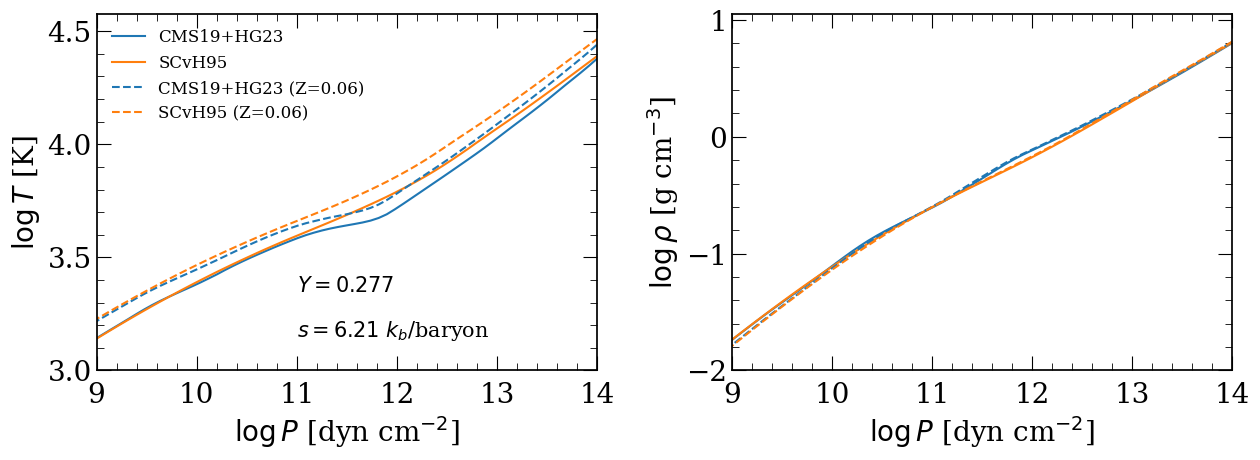

In [11]:
logpgrid = np.linspace(6, 14, 100)
s_const = np.full_like(logpgrid, 6.21) # defining a constant specific entropy at 6.21 kb/baryon (roughly equal to 7.07 kb/el-- See Hubbard & Militzer 2016)
y_const = np.full_like(logpgrid, 0.277) # roughly solar abundance

z_0 = np.zeros(len(logpgrid))
z_const = np.full_like(logpgrid, 0.06) # roughly three times solar abundance

logrho_cms, logt_cms = mixtures_eos.get_rhot_sp_tab(s_const, logpgrid, y_const, z_0, hhe_eos='cms')
logrho_scvh, logt_scvh = mixtures_eos.get_rhot_sp_tab(s_const, logpgrid, y_const, z_0, hhe_eos='scvh')

logrho_cms_z, logt_cms_z = mixtures_eos.get_rhot_sp_tab(s_const, logpgrid, y_const, z_const, hhe_eos='cms')
logrho_scvh_z, logt_scvh_z = mixtures_eos.get_rhot_sp_tab(s_const, logpgrid, y_const, z_const, hhe_eos='scvh')

fig = plt.figure(figsize=(13, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.plot(logpgrid, logt_cms, 'C0-', label='CMS19+HG23')
ax2.plot(logpgrid, logrho_cms, 'C0-')

ax1.plot(logpgrid, logt_scvh, 'C1-', label='SCvH95')
ax2.plot(logpgrid, logrho_scvh, 'C1-') 

ax1.plot(logpgrid, logt_cms_z, 'C0--', label='CMS19+HG23 (Z=0.06)')
ax2.plot(logpgrid, logrho_cms_z, 'C0--') 

ax1.plot(logpgrid, logt_scvh_z, 'C1--', label='SCvH95 (Z=0.06)')
ax2.plot(logpgrid, logrho_scvh_z, 'C1--') 

ax1.set_xlabel(r'$\log{P}$ [dyn cm$^{-2}$]')
ax1.set_ylabel(r'$\log{T}$ [K]')
ax1.set_ylim(3., )
ax1.set_xlim(9, 14)

ax1.text(11, 3.15, '$s = 6.21\ k_b/$baryon', size=15)
ax1.text(11, 3.35, '$Y = 0.277$', size=15)

ax2.set_ylim(-2, )
ax2.set_xlim(9, 14)
ax2.set_xlabel(r'$\log{P}$ [dyn cm$^{-2}$]')
ax2.set_ylabel(r'$\log{\rho}$ [g cm$^{-3}$]')

ax1.minorticks_on()
ax2.minorticks_on()

ax1.legend(frameon=False, prop={'size':12})

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')

plt.tight_layout()

plt.show()

The dip in temperature that occurs at $\sim 1$ Mbar is a result of the non-ideal interaction terms (see Militzer & Hubbard 2013).

Here, we can observe that for the Z-mixtures to be at the same entropy, they must have higher temperatures.



**CAUTION**

All of the EOS modules, including the Z modules, rely on pre-calculated tables. Functions like `get_rho_sp_tab` call the $\rho(S, P)$ precalculated table. We've provided the appropriate inversion functions, and these can be called without the `_tab` suffix. 

In other words, `get_rho_sp_tab` was calculated from the function `get_rho_sp`, and you have access to both. This is also true for `get_t_sp_tab`, and the other EOS axes, such as $S, \rho$ and $\rho, T$.

One may also access $P(\rho, T)$ and $s(\rho, T)$ through `get_p_rhot_tab(logrho, logt, y, z)` and `get_s_rhot_tab(logrho, logt, y, z)`. 

# EOS collection

The plots below showcase the collection of four H-He EOSes. The left subplot shows different isentropes-- higher entropies correspond to higher temperatures. The right subplot shows te deviation from a polytropic index of 5/3.

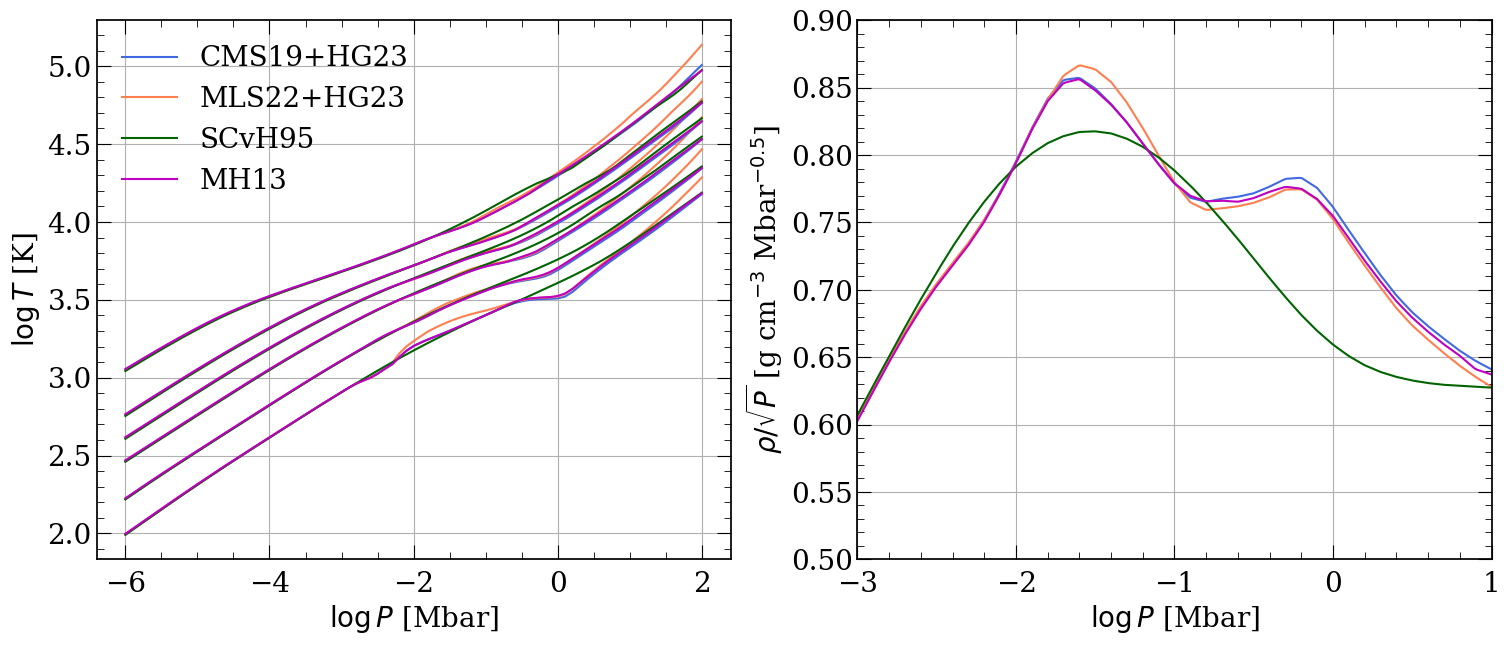

In [9]:
s_grid = [5.5, 6.21, 7.0, 7.5, 8.0, 9.0]

logpgrid = np.linspace(6, 14, 500)

y_val = np.full_like(logpgrid, 0.245)
z_val = np.zeros(len(logpgrid))

eoses = ['cms', 'mls', 'scvh', 'mh13']
labels = ['CMS19+HG23', 'MLS22+HG23', 'SCvH95', 'MH13']
colors = ['royalblue', 'coral', 'darkgreen', 'm']

plt.figure(figsize=(18, 7))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
for j, s in enumerate(s_grid):
    s_val = np.full_like(logpgrid, s)
    for i, eos in enumerate(eoses):
        rho, t = mixtures_eos.get_rhot_sp_tab(s_val, logpgrid, y_val, z_val, hhe_eos=eos)

        if j == 0:
            ax1.plot(logpgrid-12, t, c=colors[i], label=labels[i]) # Plotting pressure in Log10 Mbar
        else:
            ax1.plot(logpgrid-12, t, c=colors[i])
        if j == 1:
            ax2.plot(logpgrid-12, (10**rho / np.sqrt(10**(logpgrid-12))), c=colors[i])
        else:
            continue

    
ax1.legend(frameon=False, prop={'size':20})
ax1.set_xlabel('$\log{P}$ [Mbar]', size=20)
ax1.set_ylabel('$\log{T}$ [K]', size=20)
ax1.minorticks_on()

ax2.set_xlabel('$\log{P}$ [Mbar]', size=20)
ax2.set_ylabel(r'$\rho / \sqrt{P}$ [g cm$^{-3}$ Mbar$^{-0.5}$]', size=20)
ax2.set_xlim(-3, 1.0)
ax2.set_ylim(0.5, 0.9)

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.grid()

ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.grid()

ax2.minorticks_on()


We highlight here that all H-He EOSes converge at low pressures and low densities. The deviations at 1 Mbar correspond to non-ideal interaction terms. The MLS22 EOS appears to diverge at high temperatures for all entropies-- a behavior partially observed in Figure 6 in Mazevet et al. (2022) for Jupiter adiabats. 